# Tutorial 1: Basics of CrypTen Tensors

We now have a high-level understanding of how secure MPC works. Through these tutorials, we will explain how to use CrypTen to carry out secure operations on encrypted tensors. In this tutorial, we will introduce a fundamental building block in CrypTen, called a ```CrypTensor```.  ```CrypTensors``` are encrypted ```torch``` tensors that can be used for computing securely on data. 

CrypTen currently only supports secure MPC protocols (though we intend to add support for other advanced encryption protocols). Using the ```mpc``` backend, ```CrypTensors``` act as ```torch``` tensors whose values are encrypted using secure MPC protocols. Tensors created using the ```mpc``` backend are called ```MPCTensors```. We will go into greater detail about ```MPCTensors``` in Tutorial 2. 

Let's begin by importing ```crypten``` and ```torch``` libraries. (If the imports fail, please see the installation instructions in the README.)

In [1]:
import crypten
import torch
from crypten.config import cfg
import timeit
import crypten.communicator as comm
from crypten.config import cfg
import logging
import matplotlib.pyplot as plt

crypten.init()
logging.getLogger().setLevel(logging.INFO)

# comm.get().set_verbosity(True)
# ... do stuff ..
# comm.get().print_communication_stats()

/Users/memo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def print_diff(x, z_enc):
    diff = (x - z_enc.get_plain_text()).abs()
    print("  Diff:", diff.mean(), diff.max())
    # print(diff[:print_terms])
    plt.plot(diff)
num_iters = 1
print_terms = 18

torch.Size([10, 2])
Negative Exponential:
  Exact : tensor([[1.5230e-08, 3.7460e-08],
        [9.2136e-08, 2.2662e-07],
        [5.5739e-07, 1.3710e-06],
        [3.3720e-06, 8.2938e-06],
        [2.0399e-05, 5.0175e-05],
        [1.2341e-04, 3.0354e-04],
        [7.4659e-04, 1.8363e-03],
        [4.5166e-03, 1.1109e-02],
        [2.7324e-02, 6.7206e-02],
        [1.6530e-01, 4.0657e-01]])
  Approx: 1 iterations in 0.0024515420009265654 sec.: tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.5259e-05, 3.0518e-05],
        [9.1553e-05, 2.5940e-04],
        [6.5613e-04, 1.6937e-03],
        [4.2572e-03, 1.0651e-02],
        [2.6611e-02, 6.6162e-02],
        [1.6444e-01, 4.0553e-01]])
  Diff: tensor(0.0002) tensor(0.0010)
  Nexp   : 1 iterations in 0.005613583001832012 sec.: tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+0

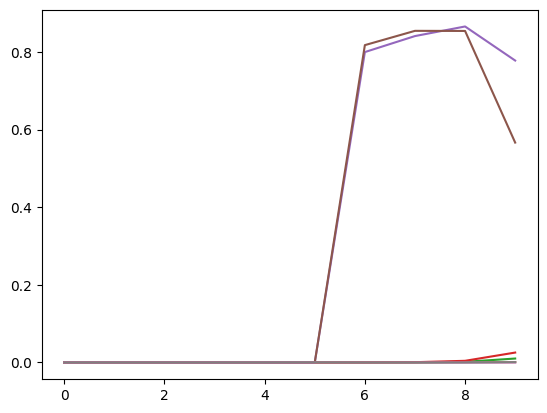

In [3]:
#Construct example input CrypTensor
x = torch.arange(-18, 0, 0.9)
x = x.reshape([10, 2])
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Negative Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'split', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Nexp   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": True}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)

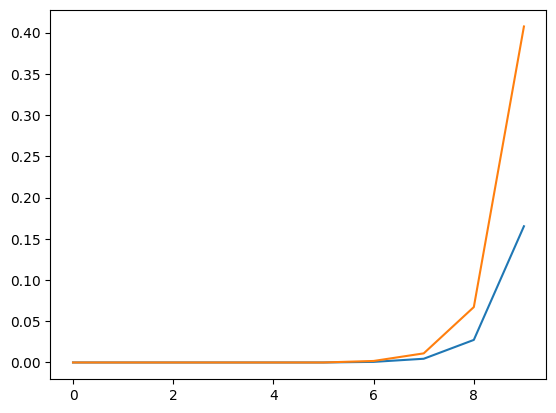

In [4]:
plt.plot(z_enc.get_plain_text())

torch.Size([54])
Exponential:
  Exact : tensor([0.0003, 0.0005, 0.0006, 0.0008, 0.0011, 0.0015, 0.0020, 0.0027, 0.0037,
        0.0050, 0.0067, 0.0091, 0.0123, 0.0166, 0.0224, 0.0302, 0.0408, 0.0550])
  Approx: 1 iterations in 0.0025318340012745466 sec.: tensor([0.0003, 0.0004, 0.0005, 0.0007, 0.0010, 0.0014, 0.0019, 0.0025, 0.0035,
        0.0047, 0.0064, 0.0087, 0.0118, 0.0160, 0.0217, 0.0295, 0.0399, 0.0541])
  Diff: tensor(18.3263) tensor(310.0916)
  Haar  : 1 iterations in 0.006007457999658072 sec.: tensor([3.3569e-04, 6.1035e-04, 1.1139e-03, 2.0599e-03, 3.7384e-03, 6.7902e-03,
        1.2482e-02, 2.2614e-02, 4.1595e-02, 7.5317e-02, 1.3638e-01, 2.5087e-01,
        4.5427e-01, 8.3553e-01, 1.5130e+00, 2.7827e+00, 5.0389e+00, 9.1243e+00])
  Diff: tensor(175.4474) tensor(2032.0232)
  Bior  : 1 iterations in 0.001581583001097897 sec.: tensor([4.5776e-04, 5.9509e-04, 1.2665e-03, 2.5330e-03, 4.9133e-03, 9.3231e-03,
        1.2192e-02, 2.5513e-02, 5.1025e-02, 9.8862e-02, 1.8730e-01, 2.449

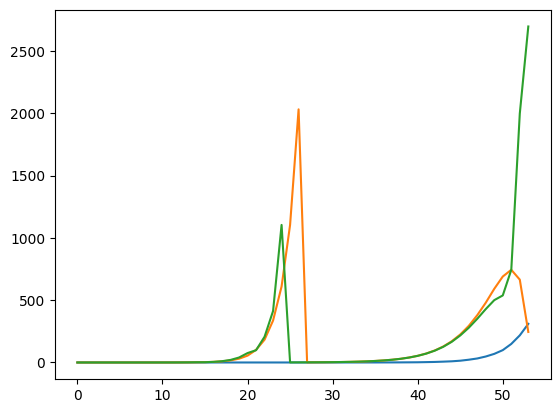

In [5]:
#Construct example input CrypTensor
x = torch.arange(-8, 8, 0.3)
print(x.size())
# x = torch.tensor([0.01, 0.5])
x_enc = crypten.cryptensor(x)

print("Exponential:")
print("  Exact :", x.exp()[:print_terms])
with cfg.temp_override({"functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'haar', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)
with cfg.temp_override({"functions.exp_method": 'bior', "functions.exp_all_neg": False}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.exp()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.exp(), z_enc)


Reciprocal:
  Exact : tensor([10.0000,  5.0000,  3.3333,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7692,  0.7143,  0.6667,  0.6250,
         0.5882,  0.5556])
  Approx: 1 iterations in 0.016706709000573028 sec.: tensor([10.0009,  5.0001,  3.3335,  2.5000,  2.0000,  1.6667,  1.4286,  1.2500,
         1.1111,  1.0000,  0.9091,  0.8333,  0.7693,  0.7143,  0.6667,  0.6250,
         0.5883,  0.5556])
  Diff: tensor(5.4541e-05) tensor(0.0009)
  Haar  : 1 iterations in 0.025794874996790895 sec.: tensor([10.0397,  4.9708,  3.3464,  2.4975,  1.9922,  1.6677,  1.4262,  1.2518,
         1.1106,  0.9980,  0.9094,  0.8325,  0.7699,  0.7141,  0.6658,  0.6251,
         0.5878,  0.5559])
  Diff: tensor(0.0011) tensor(0.0397)
  Bior  : 1 iterations in 0.004590083997754846 sec.: tensor([ 1.6116e+04,  2.1469e+03, -3.8698e+03, -1.9340e+03,  1.8936e+00,
         1.6582e+00,  1.4229e+00,  1.2419e+00,  1.1153e+00,  9.8874e-01,
         9.1100e-01,  8.3325e-0

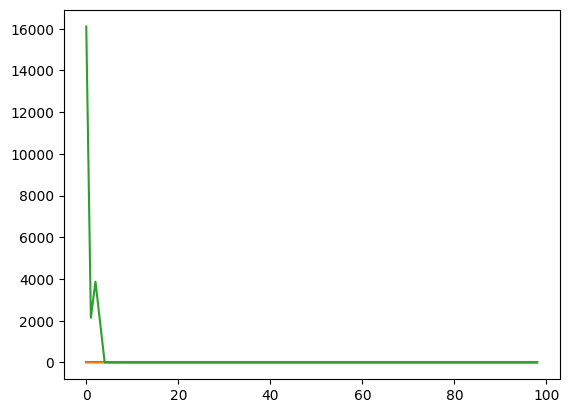

In [6]:
# x = torch.tensor([0.00005, 0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]) # , 5, 10, 50, 100 , 500, 1000, 5000, 10000, 50000])
x = torch.arange(0.1, 10, 0.1)
x_enc = crypten.cryptensor(x)

print("\nReciprocal:")
print("  Exact :", x.reciprocal()[:print_terms])
with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
# with cfg.temp_override({"functions.reciprocal_method": 'NR', "functions.exp_method": 'limit', "functions.reciprocal_initial": 1}):
#     start1 = timeit.default_timer()
#     for _ in range(num_iters):
#         z_enc = x_enc.reciprocal()  # Private
#     print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
#     print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)
with cfg.temp_override({"functions.reciprocal_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.reciprocal()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.reciprocal(), z_enc)


Logarithm (LUT faster):
  Exact : tensor([-4.6052, -3.9120, -3.5066, -3.2189, -2.9957, -2.8134, -2.6593, -2.5257,
        -2.4079, -2.3026, -2.2073, -2.1203, -2.0402, -1.9661, -1.8971, -1.8326,
        -1.7720, -1.7148])
  Approx: 1 iterations in 0.019424417001573602 sec.: tensor([-9.5972, -9.4460, -9.3022, -9.1605, -9.0254, -8.8896, -8.7595, -8.6318,
        -8.5008, -8.3755, -8.2466, -8.1220, -8.0077, -7.9075, -7.8109, -7.7110,
        -7.6146, -7.5151])
  Diff: tensor(0.3914) tensor(6.1061)
  Haar  : 1 iterations in 0.01856137499999022 sec.: tensor([-5.1546, -3.7722, -3.7722, -3.2491, -2.9094, -2.9094, -2.6568, -2.4554,
        -2.4554, -2.2880, -2.1447, -2.1447, -2.0193, -2.0193, -1.9080, -1.8078,
        -1.8078, -1.7168])
  Diff: tensor(0.0038) tensor(0.5494)
  Bior  : 1 iterations in 0.01868033299979288 sec.: tensor([-5.4848, -3.5015, -3.4472, -3.2216, -2.9930, -2.8118, -2.6605, -2.5239,
        -2.4078, -2.3030, -2.2056, -2.1204, -2.0402, -1.9650, -1.8972, -1.8324,
        -1.

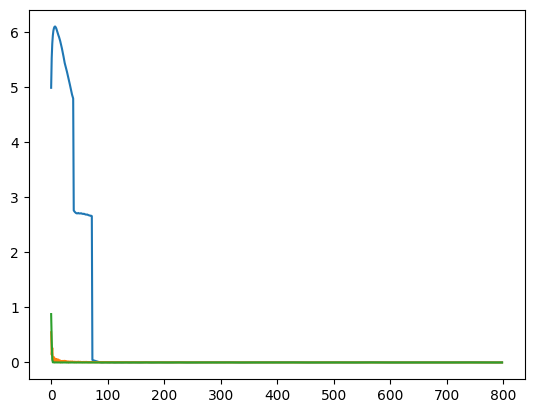

In [7]:
x = torch.arange(0.01, 8, 0.01)
x_enc = crypten.cryptensor(x)

print("\nLogarithm (LUT faster):")
print("  Exact :", x.log()[:print_terms])
with cfg.temp_override({"functions.log_method": 'iter'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)
with cfg.temp_override({"functions.log_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.log()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.log(), z_enc)

torch.Size([790])

Square Root: (LUT faster)
  Exact : tensor([0.3162, 0.3317, 0.3464, 0.3606, 0.3742, 0.3873, 0.4000, 0.4123, 0.4243,
        0.4359, 0.4472, 0.4583, 0.4690, 0.4796, 0.4899, 0.5000, 0.5099, 0.5196])
  Approx: 1 iterations in 0.009299624998675426 sec.: tensor([0.3146, 0.3306, 0.3457, 0.3601, 0.3739, 0.3871, 0.3999, 0.4122, 0.4242,
        0.4359, 0.4472, 0.4582, 0.4690, 0.4796, 0.4899, 0.5000, 0.5099, 0.5196])
  Diff: tensor(0.0015) tensor(0.0076)
  Haar   : 1 iterations in 0.01734608300102991 sec.: tensor([0.3186, 0.3423, 0.3423, 0.3644, 0.3644, 0.3852, 0.4050, 0.4050, 0.4239,
        0.4419, 0.4419, 0.4593, 0.4760, 0.4760, 0.4921, 0.5077, 0.5077, 0.5229])
  Diff: tensor(0.0012) tensor(0.0106)
  Bior   : 1 iterations in 0.003638500002125511 sec.: tensor([0.2478, 0.2667, 0.2855, 0.3044, 0.3232, 0.3420, 0.3609, 0.3797, 0.3986,
        0.4174, 0.4363, 0.4551, 0.4739, 0.4928, 0.5116, 0.5305, 0.5377, 0.5449])
  Diff: tensor(0.0012) tensor(0.0684)


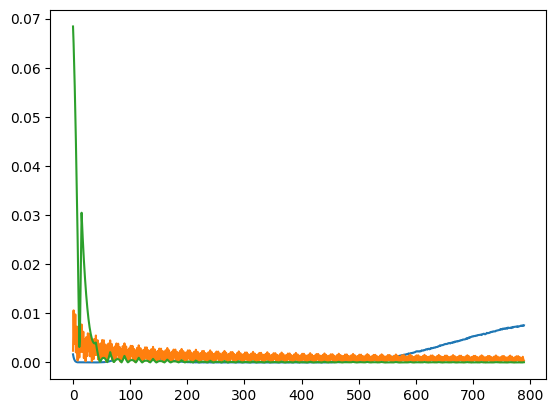

In [8]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSquare Root: (LUT faster)")
print("  Exact :", x.sqrt()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt(), z_enc)

torch.Size([790])

Inverse Square Root: (LUT faster)
  Exact : tensor([3.1623, 3.0151, 2.8868, 2.7735, 2.6726, 2.5820, 2.5000, 2.4254, 2.3570,
        2.2942, 2.2361, 2.1822, 2.1320, 2.0851, 2.0412, 2.0000, 1.9612, 1.9245])
  Approx: 1 iterations in 0.010480667002411792 sec.: tensor([3.1461, 3.0058, 2.8813, 2.7705, 2.6709, 2.5811, 2.4996, 2.4251, 2.3569,
        2.2942, 2.2361, 2.1822, 2.1321, 2.0852, 2.0413, 2.0000, 1.9612, 1.9245])
  Diff: tensor(0.0004) tensor(0.0162)
  Haar   : 1 iterations in 0.016665541999827838 sec.: tensor([3.1401, 2.9227, 2.9227, 2.7451, 2.7451, 2.5964, 2.4695, 2.4695, 2.3596,
        2.2631, 2.2631, 2.1777, 2.1012, 2.1012, 2.0322, 1.9697, 1.9697, 1.9125])
  Diff: tensor(0.0014) tensor(0.0924)
  Bior   : 1 iterations in 0.01628112500111456 sec.: tensor([3.1634, 3.0116, 2.8873, 2.7737, 2.6706, 2.5824, 2.4998, 2.4246, 2.3573,
        2.2937, 2.2358, 2.1823, 2.1315, 2.0851, 2.0413, 1.9993, 1.9612, 1.9244])
  Diff: tensor(3.0130e-05) tensor(0.0035)


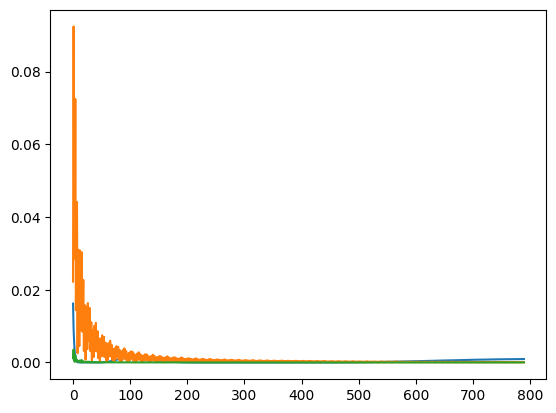

In [9]:
x = torch.arange(0.1, 8, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nInverse Square Root: (LUT faster)")
print("  Exact :", x.sqrt().reciprocal()[:print_terms])
with cfg.temp_override({"functions.sqrt_method": 'NR', "functions.inv_sqrt_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'haar', "functions.inv_sqrt_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Haar   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)
with cfg.temp_override({"functions.sqrt_method": 'bior', "functions.inv_sqrt_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.inv_sqrt()  # Private
    print("  Bior   :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    # print("  Diff:", (x.sqrt()-z_enc.get_plain_text()).abs().mean(), (x.sqrt()-z_enc.get_plain_text()).abs().max())
    print_diff(x.sqrt().reciprocal(), z_enc)

torch.Size([2, 2])

Sin:
  Exact : tensor([[0.7629, 0.8195],
        [0.0836, 0.5674]])
  Approx: 1 iterations in 0.009928999999829102 sec.: tensor([[0.7596, 0.8181],
        [0.0779, 0.5594]])
  Diff: tensor(0.0046) tensor(0.0080)
  Haar  : 1 iterations in 0.0035719169973162934 sec.: tensor([[0.7574, 0.8152],
        [0.0780, 0.5723]])
  Diff: tensor(0.0051) tensor(0.0056)
  Bior  : 1 iterations in 0.0027907080002478324 sec.: tensor([[0.7609, 0.8205],
        [0.0834, 0.5659]])
  Diff: tensor(0.0012) tensor(0.0020)


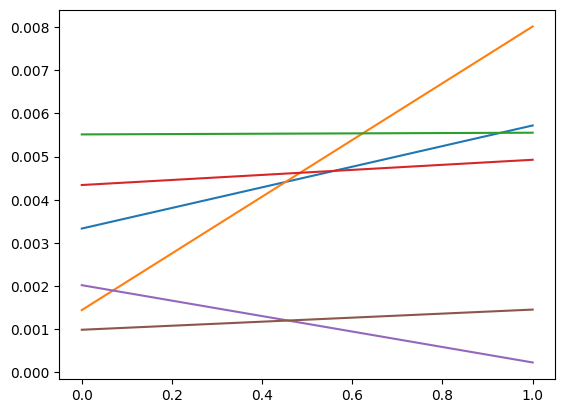

In [10]:
# x = torch.arange(-10, 10, 0.01)
x = torch.rand((2, 2))
print(x.size())
x_enc = crypten.cryptensor(x)

print("\nSin:")
print("  Exact :", x.sin()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sin()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sin(), z_enc)


Cos:
  Exact : tensor([[0.6465, 0.5730],
        [0.9965, 0.8234]])
  Approx: 1 iterations in 0.011684167002385948 sec.: tensor([[0.6568, 0.5828],
        [0.9973, 0.8316]])
  Diff: tensor(0.0073) tensor(0.0103)
  Haar  : 1 iterations in 0.007790166000631871 sec.: tensor([[0.6529, 0.5791],
        [0.9969, 0.8200]])
  Diff: tensor(0.0041) tensor(0.0064)
  Bior  : 1 iterations in 0.0030956660011725035 sec.: tensor([[0.6448, 0.5734],
        [0.9930, 0.8215]])
  Diff: tensor(0.0019) tensor(0.0035)


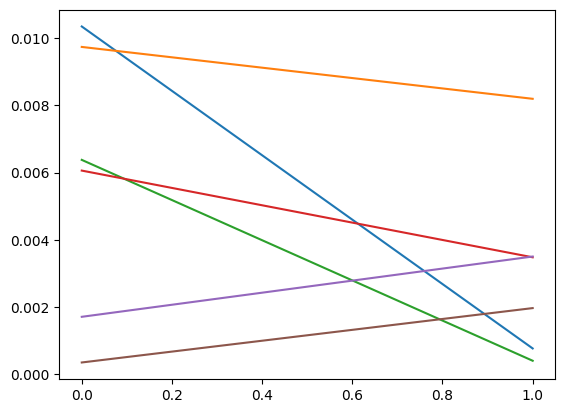

In [11]:
print("\nCos:")
print("  Exact :", x.cos()[:print_terms])
with cfg.temp_override({"functions.trigonometry_method": 'NR'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)
with cfg.temp_override({"functions.trigonometry_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.cos()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.cos(), z_enc)


Sigmoid:
  Exact : tensor([[0.7043, 0.7232],
        [0.5209, 0.6464]])
  Approx: 1 iterations in 0.010972667001624359 sec.: tensor([[0.7049, 0.7235],
        [0.5199, 0.6466]])
  Diff: tensor(0.0005) tensor(0.0010)
  Haar  : 1 iterations in 0.007338416999118635 sec.: tensor([[0.7041, 0.7233],
        [0.5215, 0.6460]])
  Diff: tensor(0.0003) tensor(0.0006)
  Bior  : 1 iterations in 0.004507875000854256 sec.: tensor([[0.7041, 0.7233],
        [0.5209, 0.6462]])
  Diff: tensor(0.0001) tensor(0.0002)


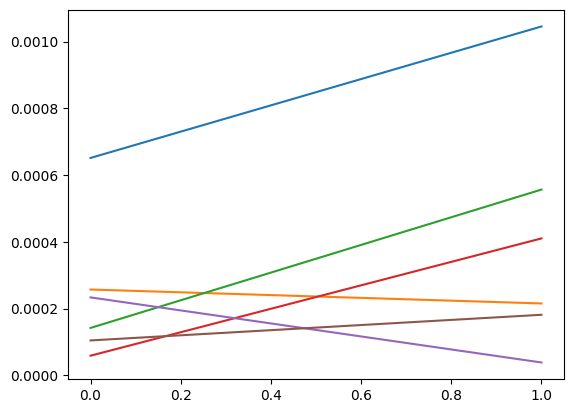

In [12]:
print("\nSigmoid:")
print("  Exact :", x.sigmoid()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.sigmoid()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.sigmoid(), z_enc)

Tanh:
  Exact : tensor([[0.7003, 0.7445],
        [0.0835, 0.5394]])
  Approx: 1 iterations in 0.010995374999765772 sec.: tensor([[0.7018, 0.7461],
        [0.0817, 0.5401]])
  Diff: tensor(0.0014) tensor(0.0018)
  Haar  : 1 iterations in 0.007190958000137471 sec.: tensor([[0.6999, 0.7447],
        [0.0857, 0.5381]])
  Diff: tensor(0.0010) tensor(0.0022)
  Bior  : 1 iterations in 0.004132792000746122 sec.: tensor([[0.6983, 0.7451],
        [0.0831, 0.5374]])
  Diff: tensor(0.0012) tensor(0.0020)


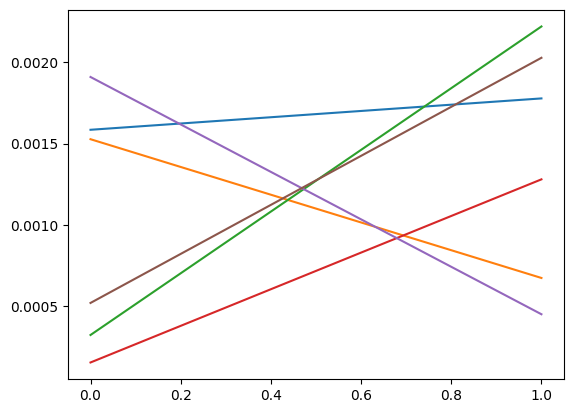

In [13]:
print("Tanh:")
print("  Exact :", x.tanh()[:print_terms])
with cfg.temp_override({"functions.sigmoid_tanh_method": 'reciprocal', "functions.reciprocal_method": 'NR', "functions.exp_method": 'limit'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)
with cfg.temp_override({"functions.sigmoid_tanh_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.tanh()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.tanh(), z_enc)

torch.Size([200])
Erf:
  Exact : tensor([-0.8427, -0.8385, -0.8342, -0.8299, -0.8254, -0.8209, -0.8163, -0.8116,
        -0.8068, -0.8019, -0.7969, -0.7918, -0.7867, -0.7814, -0.7761, -0.7707,
        -0.7651, -0.7595])
  Approx: 1 iterations in 0.01413104099992779 sec.: tensor([-0.6081, -0.6174, -0.6259, -0.6337, -0.6407, -0.6471, -0.6528, -0.6579,
        -0.6624, -0.6663, -0.6696, -0.6725, -0.6747, -0.6765, -0.6779, -0.6787,
        -0.6791, -0.6791])
  Diff: tensor(0.0192) tensor(0.2346)
  Haar  : 1 iterations in 0.011336541996570304 sec.: tensor([-0.8459, -0.8394, -0.8327, -0.8327, -0.8258, -0.8187, -0.8187, -0.8114,
        -0.8039, -0.8039, -0.7961, -0.7881, -0.7881, -0.7799, -0.7799, -0.7715,
        -0.7629, -0.7629])
  Diff: tensor(0.0033) tensor(0.0088)
  Bior  : 1 iterations in 0.0047378750023199245 sec.: tensor([-0.8470, -0.8417, -0.8365, -0.8313, -0.8260, -0.8208, -0.8156, -0.8103,
        -0.8051, -0.7999, -0.7946, -0.7894, -0.7841, -0.7789, -0.7737, -0.7684,
        -0.

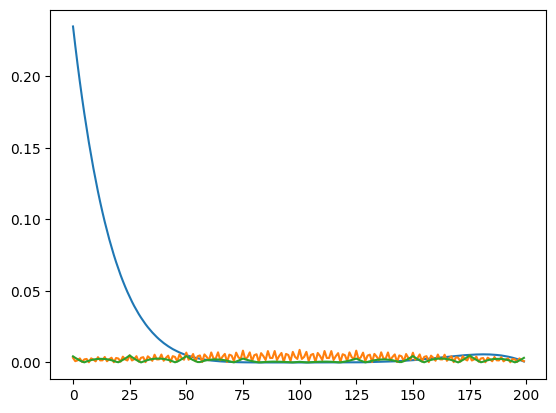

In [14]:
x = torch.arange(-1, 1, 0.01)
print(x.size())
x_enc = crypten.cryptensor(x)

print("Erf:")
print("  Exact :", x.erf()[:print_terms])
with cfg.temp_override({"functions.erf_method": 'Taylor'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Approx:", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'haar'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Haar  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)
with cfg.temp_override({"functions.erf_method": 'bior'}):
    start1 = timeit.default_timer()
    for _ in range(num_iters):
        z_enc = x_enc.erf()  # Private
    print("  Bior  :", num_iters, "iterations in",  timeit.default_timer() - start1, "sec.:", z_enc.get_plain_text()[:print_terms])
    print_diff(x.erf(), z_enc)

#### Advanced mathematics
We are also able to compute more advanced mathematical functions on ```CrypTensors``` using iterative approximations. CrypTen provides MPC support for functions like reciprocal, exponential, logarithm, square root, tanh, etc. Notice that these are subject to numerical error due to the approximations used. 

Additionally, note that some of these functions will fail silently when input values are outside of the range of convergence for the approximations used. These do not produce errors because value are encrypted and cannot be checked without decryption. Exercise caution when using these functions. (It is good practice here to normalize input values for certain models.)